<a href="https://colab.research.google.com/github/plaban1981/Pytorch_DL/blob/main/Deep_Learning_Development_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation
* The first stage of deep learning development starts with data
preparation.

## Data Loading

* PyTorch provides powerful built-in classes and utilities, such as
the **Dataset**, **DataLoader**, and **Sampler classes**, for loading various
types of data.

* The **Dataset** class defines how to access and
preprocess data from a file or data sources.

* The **Sampler** class defines how to sample data from a dataset in order to create batches

* The **DataLoader class** combines **a dataset with a
sampler** and allows you to iterate over a set of batches.

In [1]:
from torchvision.datasets import CIFAR10
train_data = CIFAR10(root="./train/",train=True,download=True)
print(train_data)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train/cifar-10-python.tar.gz to ./train/
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train


In [2]:
print(len(train_data))

50000


In [3]:
print(train_data.data.shape)

(50000, 32, 32, 3)


In [4]:
print(train_data.targets)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [5]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
print(train_data.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [7]:
test_data = CIFAR10(root="./test/",train=False,download=True)
print(test_data)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./test/cifar-10-python.tar.gz to ./test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test


In [8]:
print(test_data.data.shape)

(10000, 32, 32, 3)


## Taking a close look at training dataset

In [9]:
print(type(train_data[0]))

<class 'tuple'>


In [10]:
print(len(train_data[0]))

2


In [11]:
train_data[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F90D14DF7D0>, 6)

In [12]:
data, label = train_data[0]

In [13]:
print(type(data))

<class 'PIL.Image.Image'>


In [14]:
print(data)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F90D2299F90>


In [16]:
print(label)

6


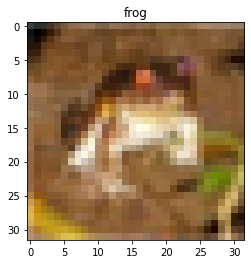

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(data)
plt.title(train_data.classes[label])
plt.show()

## Data Transforms

In [20]:
from torchvision import transforms
train_transforms = transforms.Compose([
                        transforms.RandomCrop(32, padding=4),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010))])

In [21]:
train_data = CIFAR10(root="./train/",train=True,download=True,transform=train_transforms)


Files already downloaded and verified
Files already downloaded and verified


In [22]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [23]:
print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [24]:
print(train_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [25]:
print(test_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [26]:
data, label = train_data[0]

In [28]:
print(type(data))

<class 'torch.Tensor'>


In [36]:
data.shape

torch.Size([3, 32, 32])

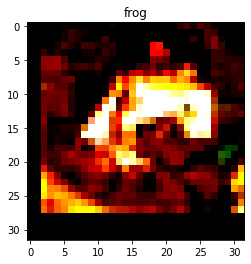

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
# Set the color channel as the third dimension
image = data.numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.title(train_data.classes[label])
plt.show()

## Test Transforms

* In the case of test data, we do not
want to crop or flip the image.
* We just need to convert the
image to tensors and normalize the tensor values.

In [37]:
test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2023, 0.1994, 0.2010))])
test_data = CIFAR10(root="./test/",train=False,download=True,transform=test_transforms)

Files already downloaded and verified


In [38]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

## Data Batching

* when we train your model, we will want to pass in small batches of data at each iteration
* Sending data in batches not only allows more efficient
training but also takes advantage of the parallel nature of
GPUs to accelerate training
* Batch processing can easily be implemented using the **torch.utils.data.DataLoader** class.

In [40]:
import torch
trainloader = torch.utils.data.DataLoader(train_data,batch_size=16,shuffle=True)

## retrieve a batch of samplesfrom the trainloader:

* We need to use iter() to cast the trainloader to an iterator
and 
* then use next() to iterate over the data one more time.
* This is only necessary when accessing one batch

In [41]:
data_batch, labels_batch = next(iter(trainloader))
print(data_batch.size())

torch.Size([16, 3, 32, 32])


In [42]:
print(labels_batch.size())

torch.Size([16])


In [44]:
testloader = torch.utils.data.DataLoader(test_data,batch_size=16,shuffle=False) # no need to shuffle test data

## General Data Preparation (torch.utils.data)

* We can use PyTorch to prepare
other types of data as well. 
* PyTorch libraries such as
**Torchtext** and **Torchaudio** provide dataset and dataloader
classes for text and audio data
* PyTorch also provides a submodule called torch.utils.data
that you can use to create your own dataset and dataloader
classes.
* It consists of **Dataset, Sampler, and DataLoader classes**.
* The simplest way to create your own dataset class is to subclass the map-style **torch.utils.data.Dataset** class and
override the getitem() and len() functions with your
own code.
* TensorDataset(tensors) - Creates a dataset object from a tensor
* ConcatDataset(datasets) - Creates a dataset from multiple datasets
* ChainDataset(datasets) - Chains multiple IterableDatasets
* Subset(dataset, indices) - Creates a subset of a dataset from specified indices

## Sampler Class - Offers a way to iterate over indices of dataset samples.
* Every Sampler subclass needs to implement an iter() method
to provide a way to iterate over indices of dataset elements and
a len() method that returns the length of the returned iterators.

* SequentialSampler(data_source) -Samples data in
sequence
* RandomSampler(data_source, replace
ment=False, num_samples=None,
generator=None)
Samples data
randomly
* SubsetRandomSampler(indices,
generator=None)
Samples data
randomly from a
subset of the
dataset
* WeightedRandomSampler(weights,
num_samples, replacement=True,
generator=None)
Samples randomly
from a weighted
distribution
* BatchSampler(sampler, batch_size,
drop_last)
Returns a batch of
samples
distributed.
*DistributedSampler(dataset,
num_replicas=None, rank=None,
shuffle=True, seed=0)
Samples across
distributed
datasets

##DataLoader classes

* The dataset and sampler objects are not iterables, meaning you
cannot run a for loop on them. 
* The dataloader object solves
this problem.

In [46]:
torch.utils.data.DataLoader(
train_data,
batch_size=1,
shuffle=False,
sampler=None,
batch_sampler=None,
num_workers=0,
collate_fn=None,
pin_memory=False,
drop_last=False,
timeout=0,
worker_init_fn=None,
multiprocessing_context=None,
generator=None)

* If we write your own dataset class, all you need to do is call the
built-in DataLoader to generate an iterable for your data.
* There
is no need to create a dataloader class from scratch

## Using existing and pretrained models

* By default, the model will be untrained and have randomly initialized
weights. 
* However, in our situation we want to use a
pretrained model, so we set pretrained = True

In [47]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

The VGG16 model consists of
three parts: 
* features, 
* avgpool, and 
* classifier

In [48]:
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


Linear, ReLU, and Dropout are torch.nn modules. torch.nn is
used to create NN layers, activations, loss functions, and other
NN component

* PyTorch Hub is another excellent resource for existing and pretrained
PyTorch models. 
* You can load models from another
repository using the torch.hub.load() API.

In [50]:
# WaveGlow that is used to generate speech from the NVIDIA DeepLearningExamples repository
waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub','nvidia_waveglow')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/nvidia/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: p

## The PyTorch NN module (torch.nn)
One of the most powerful features of PyTorch is its Python
module torch.nn, which makes it easy to design and experiment
with new models

In [51]:
import torch.nn as nn
import torch.nn.functional as F
class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet, self).__init__()
    self.fc1 = nn.Linear(2048, 256)
    self.fc2 = nn.Linear(256, 64)
    self.fc3 = nn.Linear(64,2)
  #The forward() function defines how data is passed through the network
  def forward(self, x):
    #we first use view() to reshape the input into a 2,048-element vector
    x = x.view(-1, 2048)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x),dim=1)
    return x

In [52]:
simplenet = SimpleNet()
print(simplenet)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


In [53]:
input = torch.rand(2048)
output = simplenet(input)

In [55]:
input

tensor([0.2858, 0.1387, 0.1158,  ..., 0.7350, 0.4782, 0.8434])

In [54]:
output

tensor([[0.5149, 0.4851]], grad_fn=<SoftmaxBackward0>)

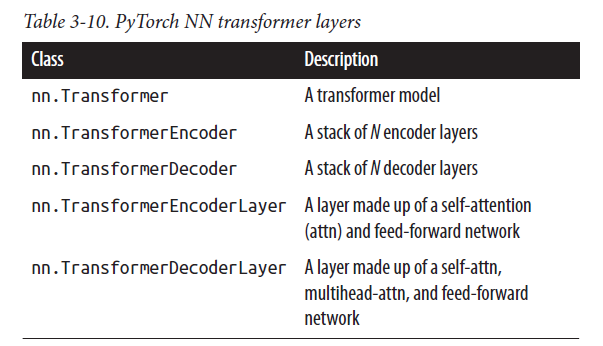

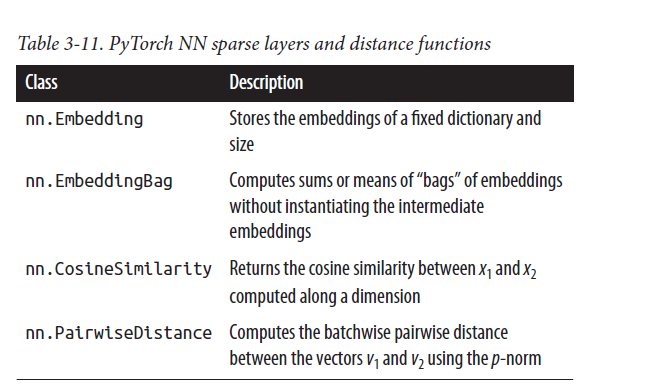

## Fundamental training loop

In [56]:
from torch import nn
import torch.nn.functional as F
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1,int(x.nelement() / x.shape[0]))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [57]:
device = ('cuda' if torch.cuda.is_available()else 'cpu')
model = LeNet5().to(device=device)

In [58]:
from torch import optim
from torch import nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

* Outer training loop; loop over 10 epochs.
* Move inputs and labels to GPU if available.
* Zero out gradients before each backpropagation pass, or
they’ll accumulate.
* Perform forward pass.
* Compute loss.
* Perform backpropagation; compute gradients.
* Adjust parameters based on gradients.
* Accumulate batch loss so we can average over the epoch.

In [59]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS):
  epoch_loss = 0.0
  for inputs, labels in trainloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
print("Epoch: {} Loss: {}".format(epoch,epoch_loss/len(trainloader)))

Epoch: 9 Loss: 1.1648161047554015


* The CrossEntropyLoss() function includes the softmax
calculation, which is usually performed in the last step of
an NN classifier model. When using CrossEntropyLoss(),
do not include Softmax() in the output layer of your
model definition.

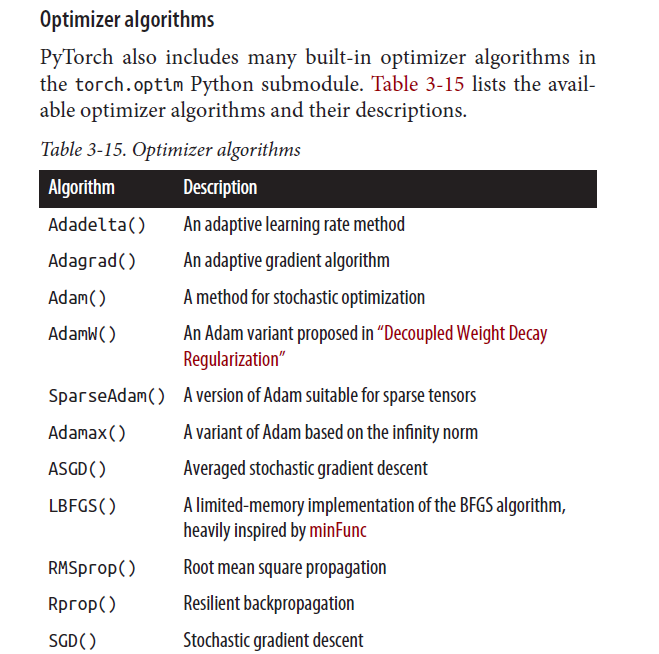

## Validation

In [67]:
from torch.utils.data import random_split
train_set, val_set = random_split(train_data,[40000, 10000])
trainloader = torch.utils.data.DataLoader(train_set,batch_size=512,shuffle=True)
valloader = torch.utils.data.DataLoader(val_set,batch_size=1512,shuffle=True)
print(len(trainloader))

79


In [68]:
print(len(valloader))

7


In [69]:
from torch import optim
from torch import nn
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [70]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS):
  # Training
  train_loss = 0.0
  model.train()
  for inputs, labels in trainloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    # Validation
    val_loss = 0.0
    model.eval()
    for inputs, labels in valloader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
  print("Epoch: {} Train Loss: {} Val Loss: {}".format(epoch,train_loss/len(trainloader),val_loss/len(valloader)))

Epoch: 0 Train Loss: 2.303408206263675 Val Loss: 2.301523889814104
Epoch: 1 Train Loss: 2.300256623497492 Val Loss: 2.298623664038522
Epoch: 2 Train Loss: 2.2967697246165217 Val Loss: 2.2945592403411865
Epoch: 3 Train Loss: 2.2911272562002836 Val Loss: 2.286679301943098
Epoch: 4 Train Loss: 2.2789421202261235 Val Loss: 2.268791879926409
Epoch: 5 Train Loss: 2.2488997073113164 Val Loss: 2.2246549810682024
Epoch: 6 Train Loss: 2.1896681695044795 Val Loss: 2.158351182937622
Epoch: 7 Train Loss: 2.1243385121792175 Val Loss: 2.0990657806396484
Epoch: 8 Train Loss: 2.077928905245624 Val Loss: 2.063817467008318
Epoch: 9 Train Loss: 2.04359555998935 Val Loss: 2.0385115827832903


## Testing

In [80]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader:
  model.eval()
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted ==y_test_batch).float().sum()
accuracy = num_correct/(len(testloader)*testloader.batch_size)
print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

625 16
Test Accuracy: 0.27730000019073486


In [78]:
accuracy

tensor(0.2773, device='cuda:0')

## Saving Models

* A common PyTorch convention is to save models using
either a .pt or .pth file extension.

In [72]:
torch.save(model.state_dict(), "./lenet5_model.pt")
model = LeNet5().to(device)
model.load_state_dict(torch.load("./lenet5_model.pt"))

<All keys matched successfully>

## Deploying to PyTorch Hub

* PyTorch Hub is a pretrained model repository designed to
facilitate research reproducibility

In [76]:
import torch
from torchvision.models import *
vgg16 = torch.hub.load("pytorch/vision:v0.13.0",'vgg16', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.13.0" to /root/.cache/torch/hub/v0.13.0.zip
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


##The hubconf.py

* This is a configuration file sets torch as a dependency. 
* Any function
defined in this file will act as an endpoint, so simply importing
the VGG16 function does the job:


In [77]:
dependencies = ['torch']
from torchvision.models.vgg import vgg16
# vgg16 is the name of the entrypoint
def vgg16(pretrained=False, **kwargs):
  """ # This docstring shows up in hub.help():
      VGG16 model
    pretrained (bool): kwargs,
      load pretrained weights into the model
  """
  # Call the model; load pretrained weights
  model = _vgg16(pretrained=pretrained, **kwargs)
  return model